In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment
from scipy.stats import wasserstein_distance as scipy_wasserstein_distance
import pandas as pd

In [2]:
# Correctness Measures

def number_of_valid_tracks(tracks, targets):
    return sum(1 for track in tracks if track in targets)

def number_of_missed_targets(tracks, targets):
    return sum(1 for target in targets if target not in tracks)

def number_of_false_tracks(tracks, targets):
    return sum(1 for track in tracks if track not in targets)

def number_of_spurious_tracks(tracks, targets):
    return sum(1 for track in tracks if tracks.count(track) > 1)

def average_number_of_swaps(tracks):
    swaps = sum(1 for i in range(1, len(tracks)) if tracks[i] != tracks[i-1])
    return swaps / len(tracks)

def average_number_of_broken_tracks(tracks, targets):
    broken_tracks = 0
    for target in targets:
        if target not in tracks:
            broken_tracks += 1
    return broken_tracks / len(targets)

def tracks_redundancy(valid_tracks, spurious_tracks):
    return valid_tracks / (valid_tracks + spurious_tracks)

In [3]:
# Timeliness Measures

def rate_of_false_alarms(false_tracks, time_steps):
    return false_tracks / time_steps

def track_probability_of_detection(tracks, target_presence_times):
    detection_probabilities = []
    for target in target_presence_times:
        detected_time = sum(1 for track in tracks if track == target)
        total_time = target_presence_times[target]
        detection_probabilities.append(detected_time / total_time)
    return np.mean(detection_probabilities)

def track_latency(detection_times, appearance_times):
    latencies = [detection_times[i] - appearance_times[i] for i in range(len(detection_times))]
    return np.mean(latencies)

def total_execution_time(start_time, end_time):
    return end_time - start_time

In [4]:
# Accuracy Measures

def rmse(estimated_states, true_states):
    return np.sqrt(np.mean((np.array(estimated_states) - np.array(true_states))**2))

def hausdorff_distance(set1, set2):
    return max(max(min(np.linalg.norm(np.array(x) - np.array(y)) for y in set2) for x in set1), 
               max(min(np.linalg.norm(np.array(y) - np.array(x)) for x in set1) for y in set2))

def custom_wasserstein_distance(set1, set2):
    return scipy_wasserstein_distance(set1, set2)

def ospa_distance(set1, set2, c, p):
    n = len(set1)
    m = len(set2)
    dist_matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            dist_matrix[i, j] = min(c, np.linalg.norm(np.array(set1[i]) - np.array(set2[j]))**p)
    
    row_ind, col_ind = linear_sum_assignment(dist_matrix)
    total_cost = dist_matrix[row_ind, col_ind].sum()
    penalty = c * (abs(n - m)**p)
    
    return (total_cost + penalty)**(1/p)

In [5]:
# Comprehensive Evaluation (CE) Approach

def cloud_barycenter_evaluation(metrics):
    return np.mean(metrics)

In [6]:
# Example Usage

tracks = [1, 2, 3, 4, 5]
targets = [1, 2, 3, 6, 7]
valid_tracks = number_of_valid_tracks(tracks, targets)
missed_targets = number_of_missed_targets(tracks, targets)
false_tracks = number_of_false_tracks(tracks, targets)
spurious_tracks = number_of_spurious_tracks(tracks, targets)
swaps = average_number_of_swaps(tracks)
broken_tracks = average_number_of_broken_tracks(tracks, targets)
redundancy = tracks_redundancy(valid_tracks, spurious_tracks)

print(f"Valid Tracks: {valid_tracks}")
print(f"Missed Targets: {missed_targets}")
print(f"False Tracks: {false_tracks}")
print(f"Spurious Tracks: {spurious_tracks}")
print(f"Swaps: {swaps}")
print(f"Broken Tracks: {broken_tracks}")
print(f"Redundancy: {redundancy:.2f}")

false_tracks_count = 3
time_steps = 50
target_presence_times = {1: 10, 2: 20, 3: 15}
detection_times = [2, 5, 10]
appearance_times = [1, 4, 8]

false_alarm_rate = rate_of_false_alarms(false_tracks_count, time_steps)
detection_prob = track_probability_of_detection(tracks, target_presence_times)
latency = track_latency(detection_times, appearance_times)
execution_time = total_execution_time(0, 100)

print(f"False Alarm Rate: {false_alarm_rate:.2f}")
print(f"Detection Probability: {detection_prob:.2f}")
print(f"Track Latency: {latency:.2f}")
print(f"Total Execution Time: {execution_time:.2f}")

estimated_states = [2, 3, 4]
true_states = [1, 3, 5]
set1 = [(1,2), (3,4), (5,6)]
set2 = [(1,2), (4,3), (6,5)]
c = 1.0
p = 2

rmse_value = rmse(estimated_states, true_states)
hausdorff_value = hausdorff_distance(set1, set2)
wasserstein_value = custom_wasserstein_distance(estimated_states, true_states)
ospa_value = ospa_distance(set1, set2, c, p)

print(f"RMSE: {rmse_value:.2f}")
print(f"Hausdorff Distance: {hausdorff_value:.2f}")
print(f"Wasserstein Distance: {wasserstein_value:.2f}")
print(f"OSPA Distance: {ospa_value:.2f}")

metrics = [rmse_value, hausdorff_value, wasserstein_value, ospa_value]
cloud_barycenter_score = cloud_barycenter_evaluation(metrics)

print(f"Cloud Barycenter Evaluation Score: {cloud_barycenter_score:.2f}")

Valid Tracks: 3
Missed Targets: 2
False Tracks: 2
Spurious Tracks: 0
Swaps: 0.8
Broken Tracks: 0.4
Redundancy: 1.00
False Alarm Rate: 0.06
Detection Probability: 0.07
Track Latency: 1.33
Total Execution Time: 100.00
RMSE: 0.82
Hausdorff Distance: 1.41
Wasserstein Distance: 0.67
OSPA Distance: 1.41
Cloud Barycenter Evaluation Score: 1.08


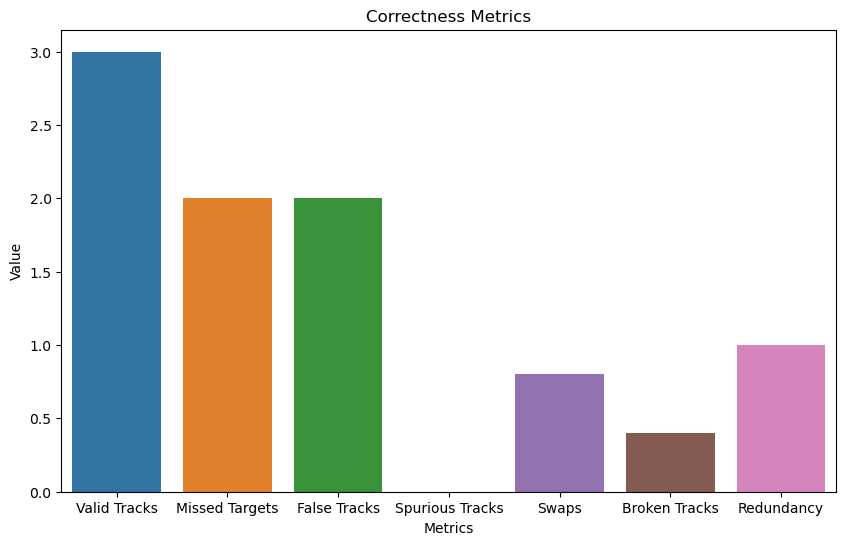

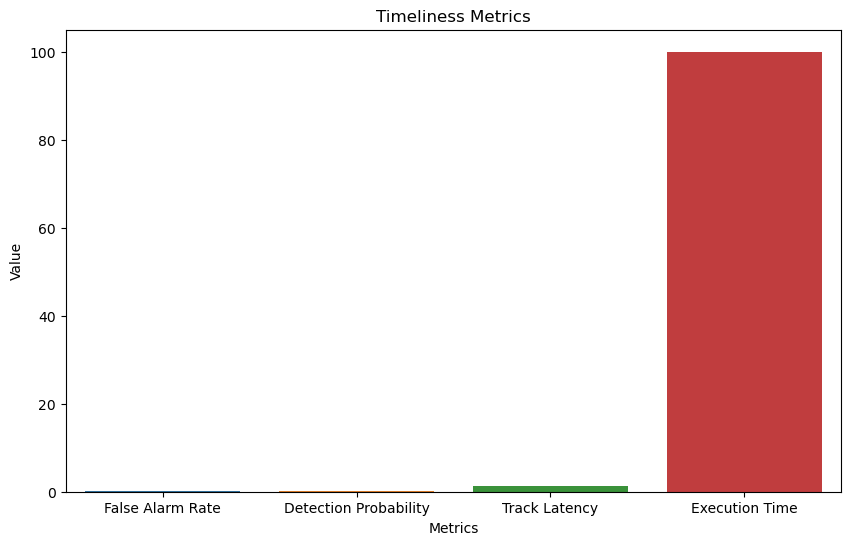

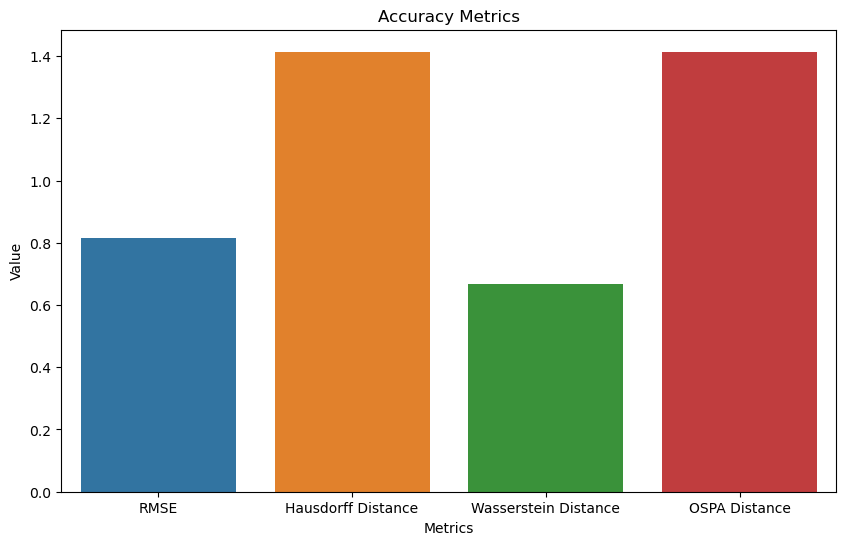

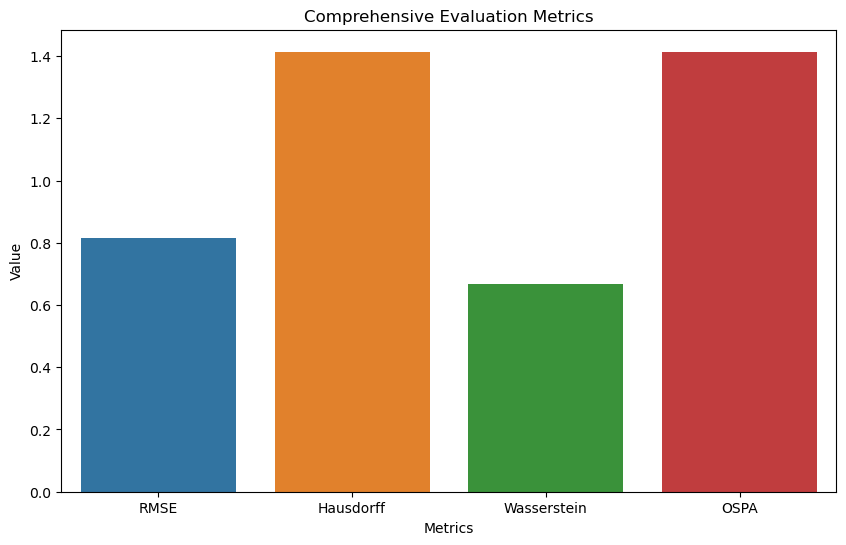

In [7]:
# Graph Generation

# Function to plot metrics
def plot_metrics(metrics, metric_names, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metric_names, y=metrics)
    plt.title(title)
    plt.ylabel('Value')
    plt.xlabel('Metrics')
    plt.show()

# Correctness metrics plot
correctness_metrics = [valid_tracks, missed_targets, false_tracks, spurious_tracks, swaps, broken_tracks, redundancy]
correctness_names = ['Valid Tracks', 'Missed Targets', 'False Tracks', 'Spurious Tracks', 'Swaps', 'Broken Tracks', 'Redundancy']
plot_metrics(correctness_metrics, correctness_names, 'Correctness Metrics')

# Timeliness metrics plot
timeliness_metrics = [false_alarm_rate, detection_prob, latency, execution_time]
timeliness_names = ['False Alarm Rate', 'Detection Probability', 'Track Latency', 'Execution Time']
plot_metrics(timeliness_metrics, timeliness_names, 'Timeliness Metrics')

# Accuracy metrics plot
accuracy_metrics = [rmse_value, hausdorff_value, wasserstein_value, ospa_value]
accuracy_names = ['RMSE', 'Hausdorff Distance', 'Wasserstein Distance', 'OSPA Distance']
plot_metrics(accuracy_metrics, accuracy_names, 'Accuracy Metrics')

# Comprehensive Evaluation plot
ce_metrics = metrics
ce_names = ['RMSE', 'Hausdorff', 'Wasserstein', 'OSPA']
plot_metrics(ce_metrics, ce_names, 'Comprehensive Evaluation Metrics')

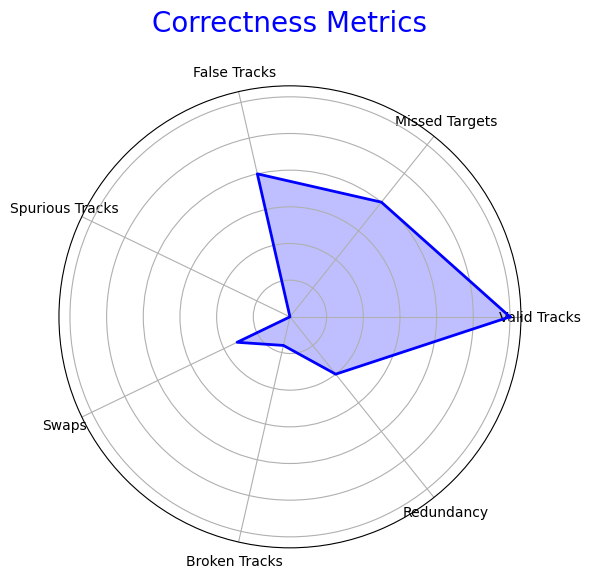

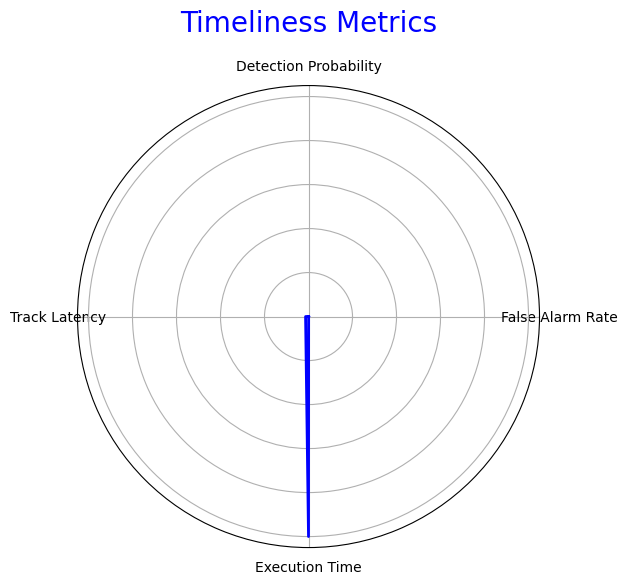

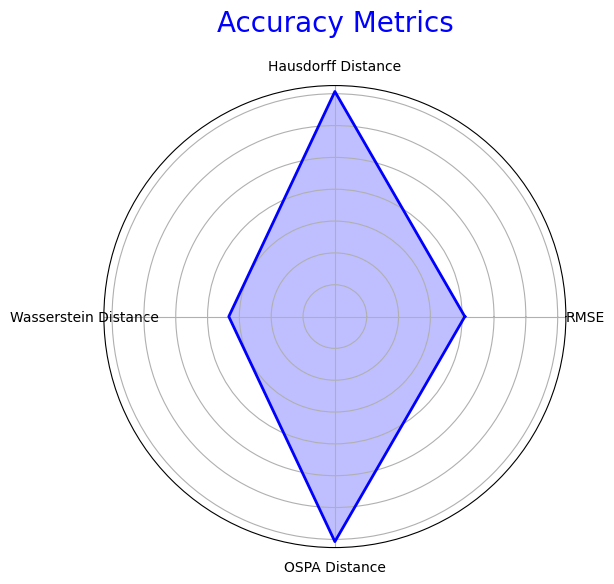

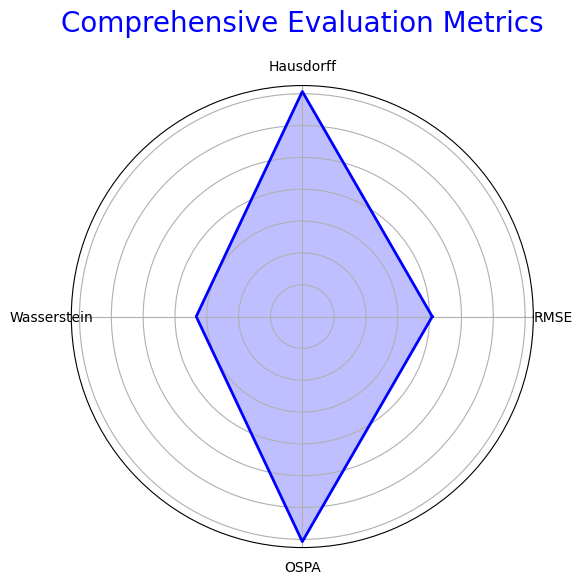

In [8]:
# Radar chart
def plot_radar_chart(metrics, metric_names, title):
    num_vars = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    metrics += metrics[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, metrics, color='blue', alpha=0.25)
    ax.plot(angles, metrics, color='blue', linewidth=2)
    ax.set_yticklabels([])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_names)

    plt.title(title, size=20, color='blue', y=1.1)
    plt.show()

# Plot radar chart for correctness metrics
plot_radar_chart(correctness_metrics, correctness_names, 'Correctness Metrics')

# Plot radar chart for timeliness metrics
plot_radar_chart(timeliness_metrics, timeliness_names, 'Timeliness Metrics')

# Plot radar chart for accuracy metrics
plot_radar_chart(accuracy_metrics, accuracy_names, 'Accuracy Metrics')

# Plot radar chart for comprehensive evaluation metrics
plot_radar_chart(ce_metrics, ce_names, 'Comprehensive Evaluation Metrics')